# Write a Python Program for frequency domain filtering (LPF & BRF)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
!wget -O lena_color.tif https://github.com/Tetroner9/Colg-Sem-VI/raw/master/IPMV/sample/lena_color.tif

--2024-04-30 00:54:41--  https://github.com/Tetroner9/Colg-Sem-VI/raw/master/IPMV/sample/lena_color.tif
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Tetroner9/Colg-Sem-VI/master/IPMV/sample/lena_color.tif [following]
--2024-04-30 00:54:41--  https://raw.githubusercontent.com/Tetroner9/Colg-Sem-VI/master/IPMV/sample/lena_color.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 787241 (769K) [image/tiff]
Saving to: ‘lena_color.tif’

lena_color.tif      100%[===================>] 768.79K  --.-KB/s    in 0.07s   

2024-04-30 00:54:41 (10

In [2]:
# Read the image
image_path = "lena_color.tif"  # Replace with image name
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [3]:
def dft2D(image):
    # Perform 2D Discrete Fourier Transform
    return np.fft.fft2(image)

def idft2D(freq_domain):
    # Perform 2D Inverse Discrete Fourier Transform
    return np.fft.ifft2(freq_domain)

def lpf_filter(image_shape, cutoff_frequency):
    # Generate a Low Pass Filter (LPF)
    rows, cols = image_shape
    lpf = np.zeros((rows, cols))
    center_row, center_col = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance <= cutoff_frequency:
                lpf[i, j] = 1
    return lpf

def brf_filter(image_shape, cutoff_low, cutoff_high):
    # Generate a Band Reject Filter (BRF)
    rows, cols = image_shape
    brf = np.ones((rows, cols))
    center_row, center_col = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if cutoff_low <= distance <= cutoff_high:
                brf[i, j] = 0
    return brf

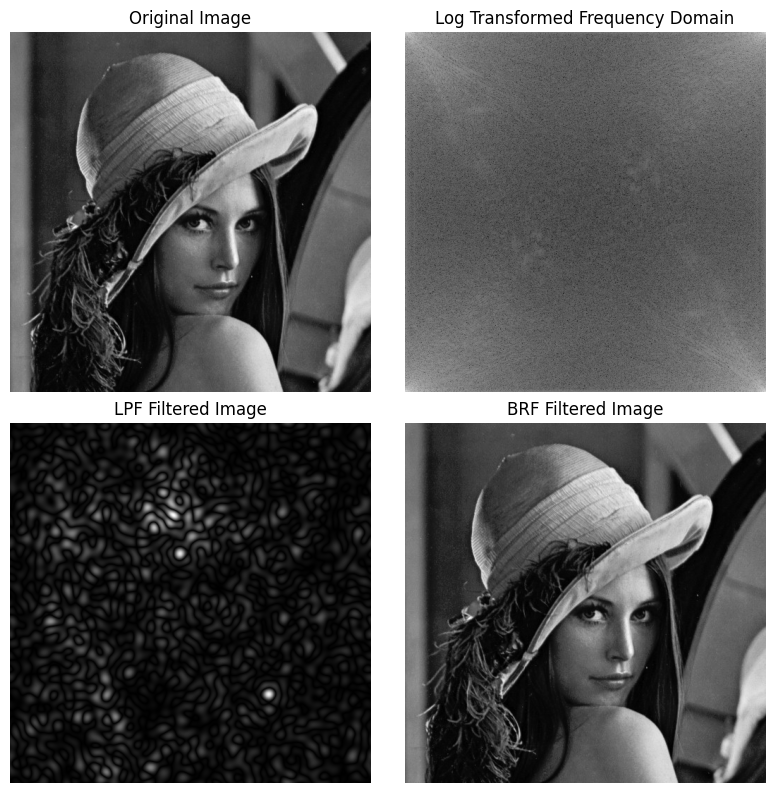

In [4]:
# Check if the image has been successfully loaded
if image is None:
    print("Error: Could not read the image.")
else:
    # Convert the image to grayscale if it's a color image
    if len(image.shape) > 2:
        image = np.mean(image, axis=2)

    # Perform 2D DFT
    freq_domain = dft2D(image)

    # Define the cutoff frequencies for LPF and BRF
    cutoff_lpf = 30
    cutoff_low_brf = 20
    cutoff_high_brf = 40

    # Apply LPF and BRF
    lpf = lpf_filter(image.shape, cutoff_lpf)
    brf = brf_filter(image.shape, cutoff_low_brf, cutoff_high_brf)
    filtered_freq_domain_lpf = freq_domain * lpf
    filtered_freq_domain_brf = freq_domain * brf

    # Reconstruct images using IDFT
    filtered_image_lpf = np.abs(idft2D(filtered_freq_domain_lpf))
    filtered_image_brf = np.abs(idft2D(filtered_freq_domain_brf))

    # Apply logarithmic transformation to enhance contrast
    freq_domain_mag_log = np.log(1 + np.abs(freq_domain))
    freq_domain_mag_log /= np.max(freq_domain_mag_log)

    # Display the original and filtered images
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(freq_domain_mag_log, cmap='gray')
    plt.title('Log Transformed Frequency Domain')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(filtered_image_lpf, cmap='gray')
    plt.title('LPF Filtered Image')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(filtered_image_brf, cmap='gray')
    plt.title('BRF Filtered Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()